# Financial Analysis and Portfolio Management Project
- **Author** : Eliott Van Dieren - Louvain School of Engineering Undergraduate student - 2nd year
- **Skills used** : Python - Stats (pct change, std, Monte Carlo) - Financial Analysis tools (Sharpe Ratio, Daily return) - Data manipulation & Visualization (pandas toolkit and matplotlib)
- **Modules used**: Pandas - Matplotlib - SciPy - NumPy - datetime

**Main Purpose :**

This project aims to give the user a complete financial analysis about 
one security (mainly stocks) such as a stock prediction chart, the main indicators (EMA, UP, DOWN,...), etc.

This project will also cover the creation and optimization of a Portfolio (from multiple stocks) by
using Monte Carlo or by minimazing the negative Sharpe Ratio.

Every notebook section will focus on different subjects listed below :
1. Imports
2. Stock Picking and Portfolio Management
3. Chart vizualisation
5. Portfolio Optimization (if applicable)

**1. Imports**

Run this cell to import all the libraries needed to run this notebook correctly

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

**2. Stock Picking**

Choose which stock you want to focus on. If you want to create a Portfolio of different stocks, feel free to add them in the **stocks list** below. In order to be recognized by the pandas_datareader module, the stock must be referenced by its ticker such as *GS* for Goldman Sachs. You also will have to tell the program about the time period you want to focus on. Write it inside the *datetime.datetime* parameters and be aware of not writing any zeros before a one digit month or day : 2012-01-01 must be written as datetime.datetime(2012,1,1)

Once you are done picking your stocks, press the *run all* button and scroll down to see all the categories tailored up on your stock selection

In [2]:
stocks = ['ALFEN.AS', 'AGS.BR','AED.BR']          #Add your stocks in this list
start_date = datetime.datetime(2020,7,30) # Set the start date ( Year - Month - Day) without 0 in first place
end_date = datetime.datetime(2020,10,30)  # Set the end date then run the cell

stocks_d = {}

for stock in stocks:
    stocks_d[stock] = web.DataReader(stock,'yahoo',start_date,end_date)

Let's now have a look at the different columns we have and the head of the stocks you just picked. Run the cell *(if not run all before)*

In [3]:
for stock in stocks:
    print("\n" + stock + "'s dataframe head : \n")
    print(stocks_d[stock].head(4))


ALFEN.AS's dataframe head : 

                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2020-07-30  38.000000  35.500000  37.950001  36.900002  219824  36.900002
2020-07-31  38.750000  36.799999  36.900002  37.000000  128940  37.000000
2020-08-03  39.900002  37.700001  37.700001  39.650002  135741  39.650002
2020-08-04  40.500000  38.650002  40.099998  39.650002  116067  39.650002

AGS.BR's dataframe head : 

                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2020-07-30  33.700001  31.450001  33.660000  31.750000  648653  29.578592
2020-07-31  32.770000  31.450001  31.969999  31.850000  620615  29.671753
2020-08-03  32.919998  31.750000  32.189999  32.919998  613756  30.668573
2020-08-04  33.980000  33.200001  33.200001  33.790001  641937  31.479076

AED.BR's dataframe head : 

                 High  

**2. Chart visualization**

For this part, you will have to choose whether you prefer using the *Close* price or the *Adj Close* price (default value = 'Close').

You will also have to un-comment the features you want to appear on the printed chart. Please note that in order to plot the Bollinger's band, you will have to un-comment the Exponential Weighted Average 50 part because the bands' computing in based on this particular Average.

In [4]:
close = 'Close' # Choose between 'Close' or 'Adj. Close'

chosen_features = [] # Do not touch 

# 1. Mean Average 50
#for stock in stocks : 
#    stocks_d[stock]['MA50'] = stocks_d[stock][close].rolling(50).mean()
#chosen_features.append('MA50')
# 2. Mean Average 200
#for stock in stocks : 
#    stocks_d[stock]['MA200'] = stocks_d[stock][close].rolling(200).mean()
#chosen_features.append('MA200')
# 3. Exponential Weighted Average 50
for stock in stocks : 
    stocks_d[stock]['EWA50'] = stocks_d[stock][close].ewm(span=50,min_periods=0,adjust=False).mean()
chosen_features.append('EWA50')
# 4. Exponential Weighted Average 200
for stock in stocks : 
    stocks_d[stock]['EWA200'] = stocks_d[stock][close].ewm(span=200,min_periods=0,adjust=False).mean()
chosen_features.append('EWA200')
# 5. Bollinger's bands (Based on the EWA50 which is then necessary)
for stock in stocks : 
    stocks_d[stock]['UP'] = stocks_d[stock]['EWA50'] + 2 * stocks_d[stock]['EWA50'].std()
    stocks_d[stock]['DOWN'] = stocks_d[stock]['EWA50'] - 2 * stocks_d[stock]['EWA50'].std()
chosen_features.append('UP')
chosen_features.append('DOWN')

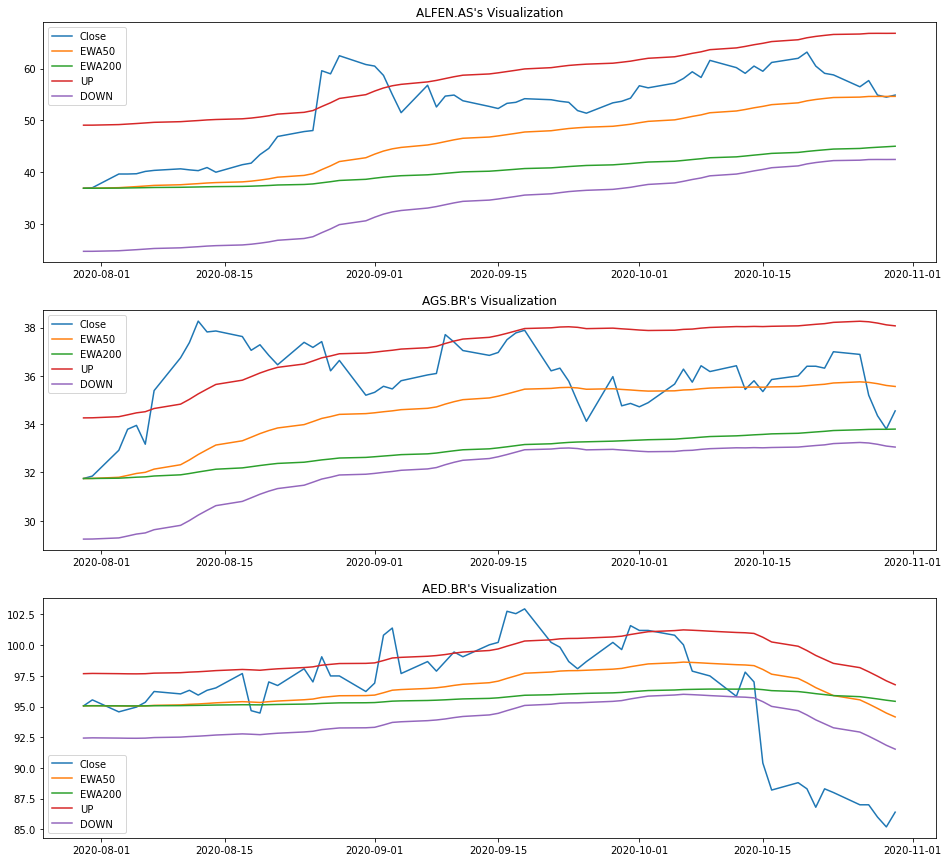

In [5]:
fig, axes = plt.subplots(nrows=len(stocks), ncols=1, figsize = (16,15))
for i in range(len(stocks)) :
    axes[i].plot(stocks_d[stocks[i]][close], label = close)
    for j in chosen_features :
        axes[i].plot(stocks_d[stocks[i]][j], label = j)
    axes[i].set_title(stocks[i] + "'s Visualization")
    axes[i].legend()

Let's have a look at the corelation between all the stocks included into our portfolio :

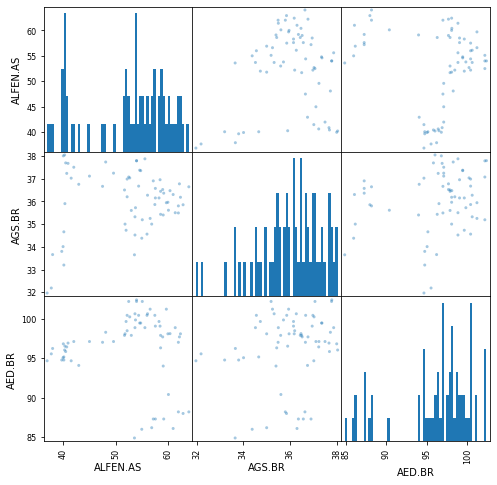

In [6]:
from pandas.plotting import scatter_matrix
portfolioClose = []
for stock in stocks :
    portfolioClose.append(stocks_d[stock]['Open'])
portfolioScatter = pd.concat(portfolioClose, axis = 1)
portfolioScatter.columns = stocks
        
scatter_matrix(portfolioScatter,figsize=(8,8),alpha=0.4,hist_kwds={'bins':60});

**4. Portfolio Construction and Allocation**

This part of the project focuses on the optimization of the Portfolio you just created before. ------

First, we have to normalize the daily return of each stock in the portfolio. This is equal to the cumulative daily return

In [7]:
for stock in stocks:
    stocks_d[stock]['Normed Return'] = stocks_d[stock]['Adj Close']/stocks_d[stock]['Adj Close'][0]

If you already have a wanted allocation, please refer it below : (else, skip this part). Default : Each allocation = 1 / #stocks in the Portfolio

In [8]:
allo = np.ones(len(stocks))
defaultAllo = 1 / len(stocks)
allo = allo * defaultAllo

for stock,alloc in zip(stocks,allo):
    stocks_d[stock]['Allocation'] = stocks_d[stock]['Normed Return']*alloc
    

Enter below the initial amount of the portfolio :

In [9]:
initialAmount = 1300

We then define the total position value for each stock in the Portfolio during the period of time referred at the begining. By creating another DataFrame, we will have a nice view over the changes and growth of our Stock Portfolio

In [10]:
totalPos = []
for stock in stocks:
    stocks_d[stock]['Position Value'] = stocks_d[stock]['Allocation']*initialAmount
    totalPos.append(stocks_d[stock]['Position Value'])

totalPos_df = pd.concat(totalPos, axis = 1)
totalPos_df.columns = stocks
totalPos_df['Total Pos'] = totalPos_df.sum(axis=1)

In [11]:
totalPos_df.head()

,ALFEN.AS,AGS.BR,AED.BR,Total Pos
Date,,,,
2020-07-30,433.333333,433.333333,433.333333,1300.000000
2020-07-31,434.507660,434.698158,435.555506,1304.761325
2020-08-03,465.627822,449.301812,431.111090,1346.040724
2020-08-04,465.627822,461.175872,431.999994,1358.803688
2020-08-05,466.214985,463.359598,432.888899,1362.463482


Text(0.5, 1.0, 'Total Portfolio Value')

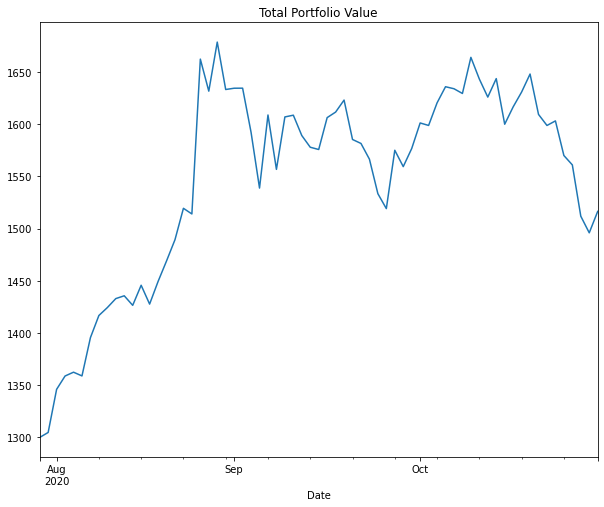

In [12]:
totalPos_df['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

You can see below each position of your portfolio per stock :

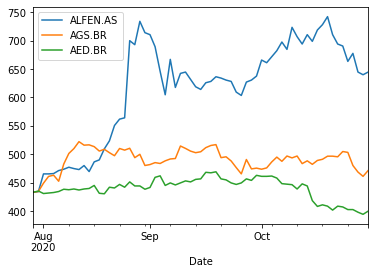

In [13]:
totalPos_df.drop('Total Pos',axis=1).plot(kind='line');

In [14]:
totalPos_df['Daily Return'] = totalPos_df['Total Pos'].pct_change(1)

Actual Sharpe Ratio of the portfolio (we will then optimize it by using Monte-Carlo Simulation and other techniques) :

The Sharpe Ratio = (Mean of the daily return of the Portfolio - Yearly Rates (~0%)) / (Standard Deviation of the Portfolio daily return) 

In [15]:
SR = totalPos_df['Daily Return'].mean()/totalPos_df['Daily Return'].std()
SR

0.12137852614792084

In [16]:
ASR = (252**0.5)*SR # Multiply it by sqrt(252) because we take a daily basis (252 business days)
ASR

1.9268243681456956

In [17]:
totalPos_df['Daily Return'].std()

0.020994037215863726

In [18]:
totalPos_df['Daily Return'].mean()

0.0025482252951561386

**4. Portfolio Optimization**
After creating and exploring your portfolio, we will try to maximize the Sharpe Ratio which gives us the difference between our return and the annual bank return (which is approximated to 0%)

Let's start with the Monte-Carlo Simulation (Feel free to change the number of iterations below *num_iterations*):

In [19]:
#Logarithmic return (instead of the arithmetic one)
logRetList = []
for stock in stocks :
    logRetList.append(np.log(stocks_d[stock]['Close']/stocks_d[stock]['Close'].shift(1)))
logRet = pd.concat(logRetList, axis = 1)
logRet.columns = stocks


num_iterations = 2000

allAllo = np.zeros((num_iterations,len(stocks)))
retArray = np.zeros(num_iterations)
volArray = np.zeros(num_iterations)
sharpeArr = np.zeros(num_iterations)

for i in range(num_iterations):

    # Create Random Allocations
    allo = np.array(np.random.random(len(stocks)))

    # Rebalance Allocations
    allo = allo / np.sum(allo)
    
    # Save Allocations
    allAllo[i,:] = allo

    # Expected Return
    retArray[i] = np.sum((logRet.mean() * allo) *252)

    # Expected Variance
    volArray[i] = np.sqrt(np.dot(allo.T, np.dot(logRet.cov() * 252, allo)))

    # Sharpe Ratio
    sharpeArr[i] = retArray[i]/volArray[i]

In [20]:
maxindex = sharpeArr.argmax()
print('Monte-Carlo Simulation results : \n')
print('Max value found for the Sharpe Ratio : '+ str(sharpeArr.max()) + '\n')

print('Allocation of the portfolio in order to maximize the SR : '+ str(allAllo[maxindex,:]) + '\n')

print('Expected return for this portfolio allocation : '+ str(retArray[maxindex]) + '\n')

print('Expected volatility : '+ str(volArray[maxindex]))

Monte-Carlo Simulation results : 

Max value found for the Sharpe Ratio : 2.3950586681805004

Allocation of the portfolio in order to maximize the SR : [6.41776589e-01 3.57927821e-01 2.95590208e-04]

Expected return for this portfolio allocation : 1.0889491519777015

Expected volatility : 0.45466491758423777


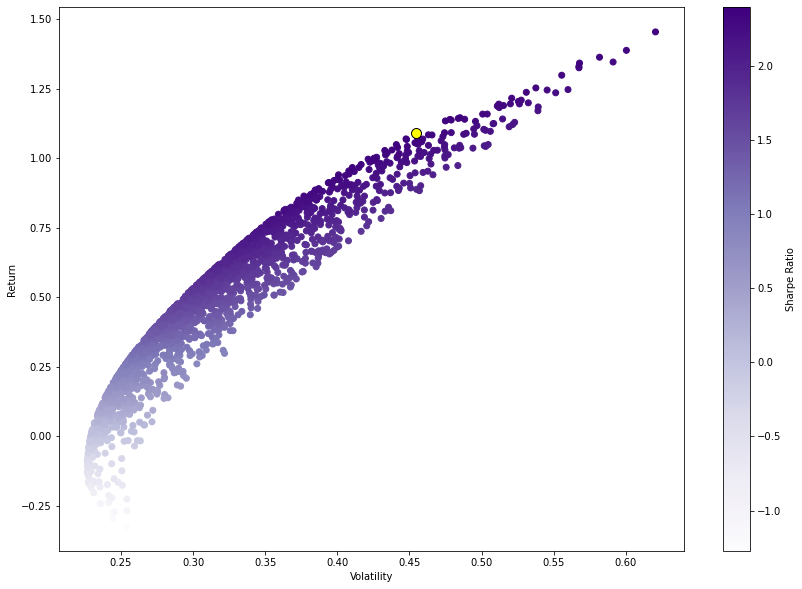

In [21]:
plt.figure(figsize=(14,10))
plt.scatter(volArray,retArray,c=sharpeArr,cmap='Purples')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Find the MAX Dot (Yellow Dot)
plt.scatter(volArray[maxindex],retArray[maxindex],c='yellow',s=100,edgecolors='black');

Now let's redo the portfolio optimization but with a more mathematical way : maximizing the SR with the function minimize (we will minimize -1 * SR).

First, let's create a function that will give us the Return, Volatility and Sharpe Ratio for a certain Allocation list :

In [22]:
def get_ret_vol_sr(allo):
    """
    @param : Allocations ( >= 0 )
    @return : Return, Volatility and Sharpe Ratio
    """
    allo = np.array(allo)
    ret = np.sum(logRet.mean() * allo) * 252
    vol = np.sqrt(np.dot(allo.T, np.dot(logRet.cov() * 252, allo)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [23]:
from scipy.optimize import minimize

Now, we have to specify what we want to minimize (neg_sharpe) and the contraints we want to add to our optimization (the sum of all the allocations must be equal to 1). 

We then run the minimize function which will give us the optimized allocations for our portfolio !

In [24]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [25]:
# Contraints - Check if the weights' sum equals 1
def check_sum(weights):
    return np.sum(weights) - 1

In [26]:
cons = ({'type':'eq','fun': check_sum})

In [27]:
tupleList = []
for stock in stocks:
    tupleList.append((0,1))
bounds = tuple(tupleList)

In [28]:
init_guess = np.ones(len(stocks))*(len(stock)**(-1))

In [29]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [30]:
optAllo = opt_results.x
optSR = get_ret_vol_sr(optAllo)[2]
print("Optimization results : \n")

print("The best Sharpe Ratio is : " + str(optSR) + '\n')
print("The portfolio allocation for each stock must be : ")
for i in range(len(stocks)):
    print(stocks[i] + ': ' + str(optAllo[i]))

Optimization results : 

The best Sharpe Ratio is : 2.3996548330660126

The portfolio allocation for each stock must be : 
ALFEN.AS: 0.7029507388240827
AGS.BR: 0.2970492611759174
AED.BR: 1.6385770318253067e-17
